#Ejercicio 12
##Multiplicación de señales: modulación de amplitud simple (AM-DSB)

- Implementar una modulación AM básica multiplicando una señal de mensaje por una portadora.
- Crear una señal de mensaje m(t): seno de 200 Hz, amplitud 1.0.
- Crear una señal portadora c(t): seno de 5 kHz, amplitud 1.0.
- Calcular la señal modulada y(t) = (1 + m(t)) * c(t).
- Graficar: - Mensaje en el tiempo. - Portadora en el tiempo (zoom). - Señal modulada. - Espectro de la modulada (FFT hasta 8 kHz).
- Probar con distintos índices de modulación (cambiar la amplitud de m(t)).
- Observar la distorsión cuando el índice de modulación es > 1 (sobremodulación).

##Extras: Graficar todas estas:
- AM-DSB con portadora (AM-DSB-FC)
- AM-DSB sin portadora (AM-DSB-SC)
- AM con banda lateral única (SSB - Single Side Band)
- SSB con portadora suprimida (SSB-SC)

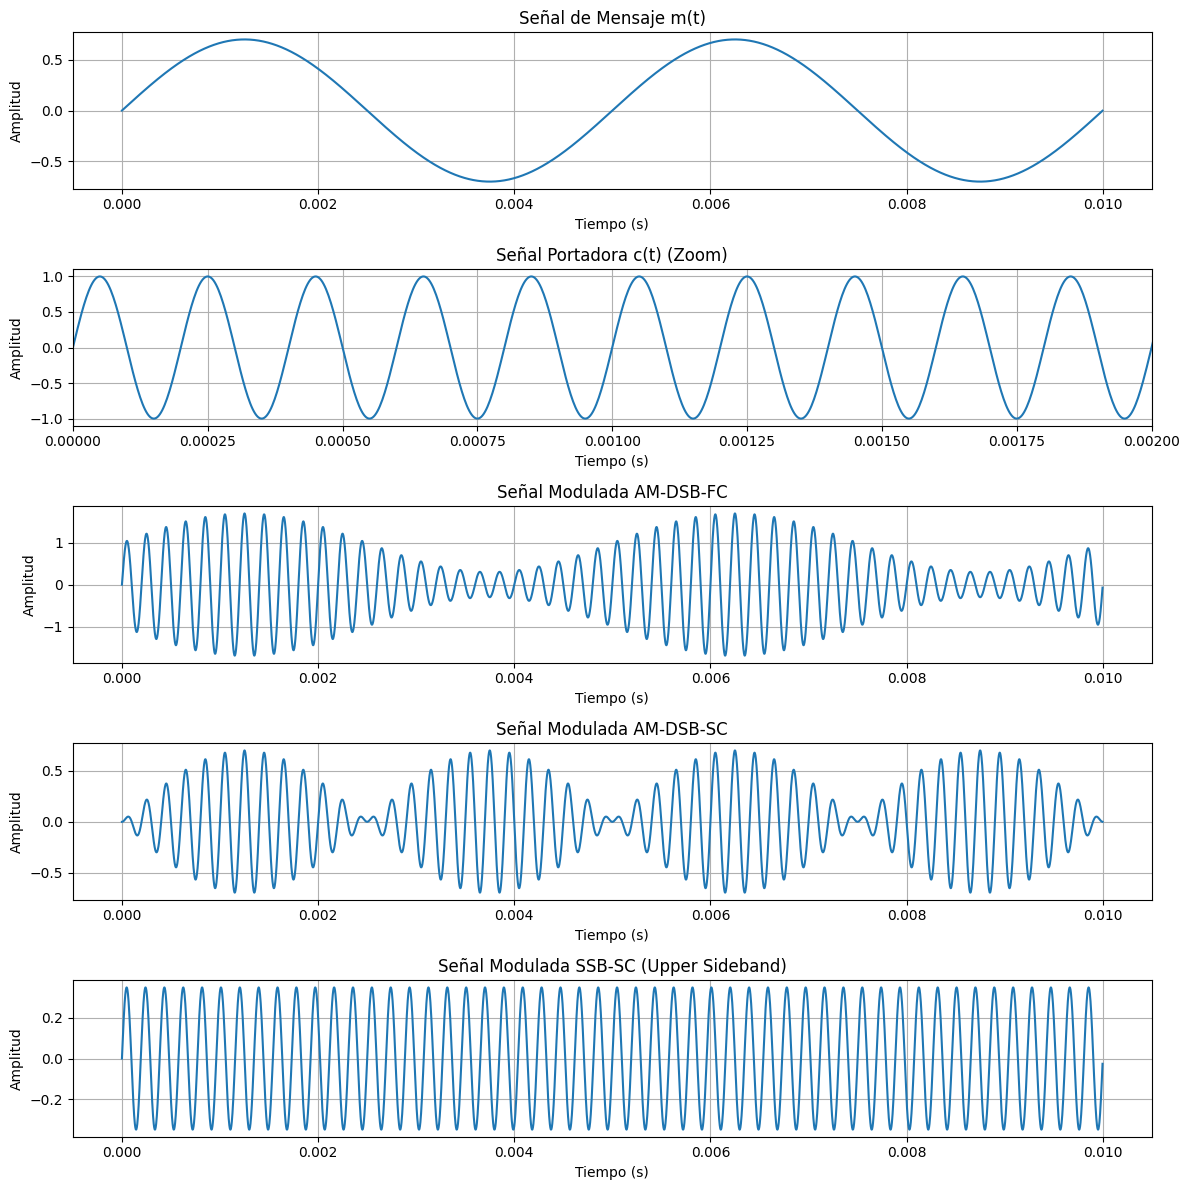

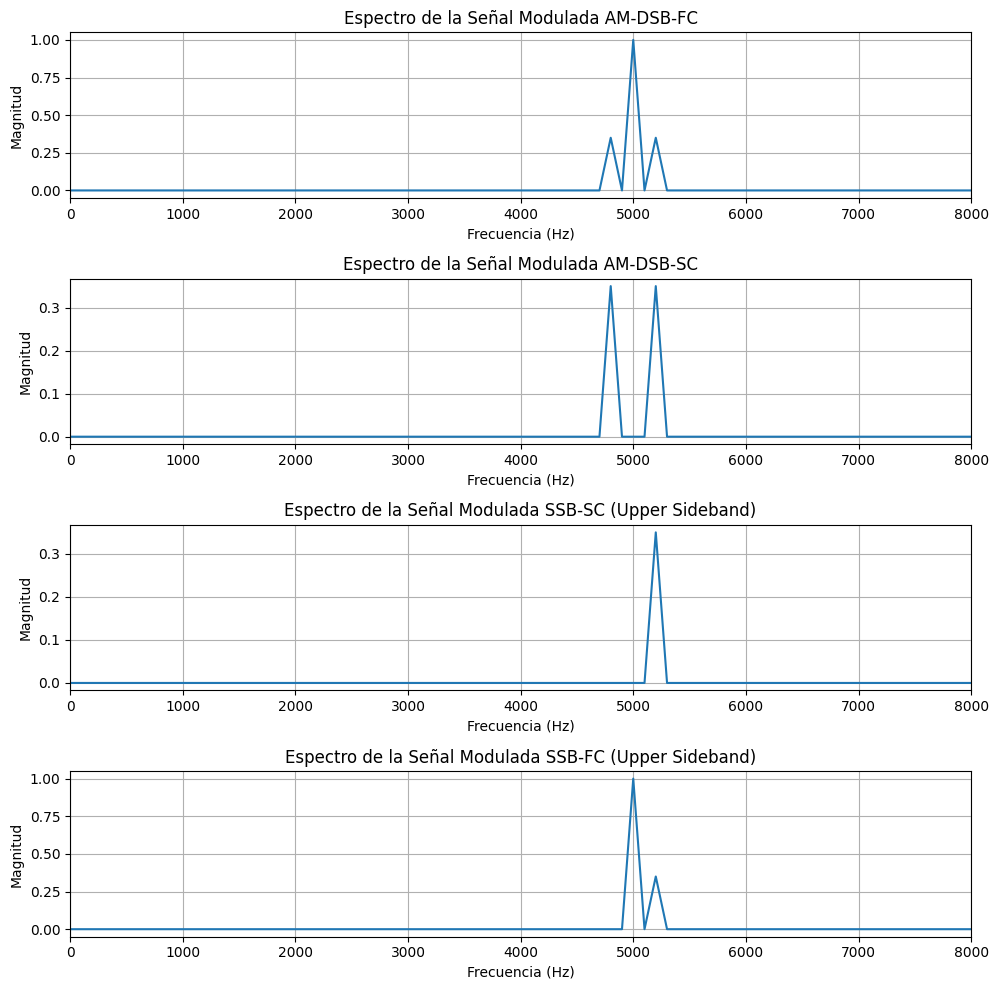

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import hilbert

# Parámetros
fs = 441000  # Frecuencia de muestreo (Hz)
t = np.linspace(0, 0.01, int(fs * 0.01), endpoint=False) # Vector de tiempo (10 ms)

# Señal de mensaje m(t)
fm = 200 # Frecuencia del mensaje (Hz)
Am = 0.7 # Amplitud del mensaje (inicial)
m_t = Am * np.sin(2 * np.pi * fm * t)

# Señal portadora c(t)
fc = 5000  # Frecuencia de la portadora (Hz)
Ac = 1.0 # Amplitud de la portadora
c_t = Ac * np.sin(2 * np.pi * fc * t)

# Señal modulada AM-DSB-FC (con portadora)
y_dsb_fc_t = (1 + m_t) * c_t

# Señal modulada AM-DSB-SC (sin portadora)
y_dsb_sc_t = m_t * c_t

# Señal analítica del mensaje
m_analytic = hilbert(m_t)

# Señal modulada SSB-SC (Single Side Band - Suppressed Carrier) - Upper Sideband
y_ssb_sc_t = 0.5 * (m_t * np.cos(2 * np.pi * fc * t) - np.imag(m_analytic) * np.sin(2 * np.pi * fc * t))

# Señal modulada SSB-FC (Single Side Band - Full Carrier) - Upper Sideband
y_ssb_fc_t = Ac * np.cos(2 * np.pi * fc * t) + 0.5 * (m_t * np.cos(2 * np.pi * fc * t) - np.imag(m_analytic) * np.sin(2 * np.pi * fc * t))


# Graficando en el dominio del tiempo
plt.figure(figsize=(12, 12))

plt.subplot(5, 1, 1)
plt.plot(t, m_t)
plt.title('Señal de Mensaje m(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(5, 1, 2)
plt.plot(t, c_t)
plt.title('Señal Portadora c(t) (Zoom)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim(0, 0.002) # Zoom para ver los ciclos de la portadora
plt.grid(True)

plt.subplot(5, 1, 3)
plt.plot(t, y_dsb_fc_t)
plt.title('Señal Modulada AM-DSB-FC')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(5, 1, 4)
plt.plot(t, y_dsb_sc_t)
plt.title('Señal Modulada AM-DSB-SC')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(5, 1, 5)
plt.plot(t, y_ssb_sc_t)
plt.title('Señal Modulada SSB-SC (Upper Sideband)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# Graficando en el dominio de la frecuencia (Espectro de las señales moduladas)
yf_dsb_fc = fft(y_dsb_fc_t)
yf_dsb_sc = fft(y_dsb_sc_t)
yf_ssb_sc = fft(y_ssb_sc_t)
yf_ssb_fc = fft(y_ssb_fc_t)

xf = fftfreq(len(t), 1/fs)

# Graficar solo hasta 8 kHz
xf_plot = xf[:len(t)//2]
yf_dsb_fc_plot = 2.0/len(t) * np.abs(yf_dsb_fc[0:len(t)//2])
yf_dsb_sc_plot = 2.0/len(t) * np.abs(yf_dsb_sc[0:len(t)//2])
yf_ssb_sc_plot = 2.0/len(t) * np.abs(yf_ssb_sc[0:len(t)//2])
yf_ssb_fc_plot = 2.0/len(t) * np.abs(yf_ssb_fc[0:len(t)//2])


plt.figure(figsize=(10, 10))

plt.subplot(4, 1, 1)
plt.plot(xf_plot, yf_dsb_fc_plot)
plt.title('Espectro de la Señal Modulada AM-DSB-FC')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(0, 8000) # Limitar la frecuencia a 8 kHz
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(xf_plot, yf_dsb_sc_plot)
plt.title('Espectro de la Señal Modulada AM-DSB-SC')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(0, 8000) # Limitar la frecuencia a 8 kHz
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(xf_plot, yf_ssb_sc_plot)
plt.title('Espectro de la Señal Modulada SSB-SC (Upper Sideband)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(0, 8000) # Limitar la frecuencia a 8 kHz
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(xf_plot, yf_ssb_fc_plot)
plt.title('Espectro de la Señal Modulada SSB-FC (Upper Sideband)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(0, 8000) # Limitar la frecuencia a 8 kHz
plt.grid(True)

plt.tight_layout()
plt.show()


# Experimentar con diferentes índices de modulación (cambiar Am)
# Observar la distorsión cuando Am > 1 (sobremodulación)

# Ejemplo de cómo cambiar Am para causar sobremodulación:
# Am = 1.5 # Descomente esta línea y vuelva a ejecutar la celda para ver la sobremodulación
# m_t = Am * np.sin(2 * np.pi * fm * t)
# y_t = (1 + m_t) * c_t
# (Luego vuelva a ejecutar el código de graficación anterior para ver el efecto)

#Resumen
El código simula y visualiza diferentes tipos de señales moduladas en amplitud (AM): AM-DSB-FC (Doble Banda Lateral - Portadora Completa), AM-DSB-SC (Doble Banda Lateral - Portadora Suprimida), SSB-SC (Banda Lateral Única - Portadora Suprimida) y SSB-FC (Banda Lateral Única - Portadora Completa).

##Partes clave del código:

- Importar Librerías: Importa las librerías necesarias para operaciones numéricas (numpy), graficación (matplotlib.pyplot) y procesamiento de señales (scipy.fft, scipy.signal).

- Parámetros: Define parámetros como la frecuencia de muestreo (fs), el vector de tiempo (t), la frecuencia (fm) y amplitud (Am) de la señal de mensaje, y la frecuencia (fc) y amplitud (Ac) de la señal portadora.

- Generación de Señales:
Crea la señal de mensaje m_t como una onda sinusoidal.
Crea la señal portadora c_t como una onda sinusoidal.


- Modulación:
Calcula y_dsb_fc_t para AM-DSB-FC.
Calcula y_dsb_sc_t para AM-DSB-SC.
Calcula y_ssb_sc_t para SSB-SC utilizando la transformada de Hilbert de la señal de mensaje.
Calcula y_ssb_fc_t para SSB-FC.

- Graficación en el Dominio del Tiempo: Grafica la señal de mensaje, la señal portadora (con un zoom) y las tres señales moduladas en el dominio del tiempo.
Análisis en el Dominio de la Frecuencia (FFT):
Calcula la Transformada Rápida de Fourier (FFT) para cada señal modulada para analizar su contenido de frecuencia.
Calcula el eje de frecuencias correspondiente (xf).

- Graficación en el Dominio de la Frecuencia: Grafica el espectro de magnitud de cada señal modulada, limitando el rango de frecuencias a 8 kHz para enfocarse en las partes relevantes del espectro.

- Nota de Experimentación: Incluye código comentado e instrucciones sobre cómo cambiar la amplitud del mensaje (Am) para observar el efecto de la sobremodulación (cuando Am > 1).

En esencia, el código genera y visualiza las formas de onda en el dominio del tiempo y los espectros en el dominio de la frecuencia de varias técnicas de modulación AM, permitiéndote ver cómo la señal de mensaje afecta a la portadora y cómo los diferentes tipos de modulación resultan en características espectrales distintas.